### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
tf.__version__

'1.13.1'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
from keras.utils import to_categorical

In [8]:
y_trn= to_categorical(trainY, num_classes=len(np.unique(trainY)))

In [9]:
y_test= to_categorical(testY, num_classes=len(np.unique(testY)))

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [11]:
print ("label for each of the above image:")
print (trainY[0:10])

label for each of the above image:
[9 0 0 3 0 2 7 2 5 5]


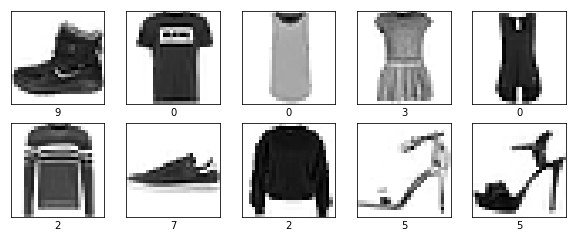

In [13]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [14]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [15]:
trainX.shape

(60000, 28, 28)

In [16]:
#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [17]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [19]:
model.fit(trainX, y_trn, 
          validation_data=(testX, y_test), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 0s 8us/sample - loss: 15.1256 - acc: 0.0538 - val_loss: 14.2723 - val_acc: 0.1125
Epoch 2/50
60000/60000 [==============================] - 0s 5us/sample - loss: 14.2679 - acc: 0.1122 - val_loss: 13.8041 - val_acc: 0.1393
Epoch 3/50
60000/60000 [==============================] - 0s 5us/sample - loss: 13.8326 - acc: 0.1369 - val_loss: 12.9302 - val_acc: 0.1923
Epoch 4/50
60000/60000 [==============================] - 0s 5us/sample - loss: 12.9670 - acc: 0.1902 - val_loss: 12.8462 - val_acc: 0.1979
Epoch 5/50
60000/60000 [==============================] - 0s 5us/sample - loss: 12.8806 - acc: 0.1954 - val_loss: 12.8615 - val_acc: 0.1971
Epoch 6/50
60000/60000 [==============================] - 0s 5us/sample - loss: 12.8648 - acc: 0.1974 - val_loss: 13.1475 - val_acc: 0.1790
Epoch 7/50
60000/60000 [==============================] - 0s 5

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [21]:
model.fit(trainX, y_trn, 
          validation_data=(testX, y_test), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 25us/sample - loss: 3.2063 - acc: 0.0718 - val_loss: 13.6401 - val_acc: 0.0718
Epoch 2/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.8699 - acc: 0.0948 - val_loss: 11.7935 - val_acc: 0.0741
Epoch 3/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.5931 - acc: 0.1238 - val_loss: 9.4452 - val_acc: 0.0890
Epoch 4/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3649 - acc: 0.1635 - val_loss: 7.2988 - val_acc: 0.1216
Epoch 5/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.1761 - acc: 0.2094 - val_loss: 5.7400 - val_acc: 0.1694
Epoch 6/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.0192 - acc: 0.2611 - val_loss: 4.7099 - val_acc: 0.2217
Epoch 7/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.8883 - acc: 0.3122 - val_loss: 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [22]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

In [23]:
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(trainX, y_trn, 
          validation_data=(testX, y_test), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.8898 - acc: 0.6941 - val_loss: 1.1439 - val_acc: 0.6552
Epoch 2/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.8894 - acc: 0.6944 - val_loss: 1.1350 - val_acc: 0.6565
Epoch 3/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.8889 - acc: 0.6946 - val_loss: 1.1265 - val_acc: 0.6577
Epoch 4/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.8884 - acc: 0.6948 - val_loss: 1.1182 - val_acc: 0.6595
Epoch 5/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.8879 - acc: 0.6949 - val_loss: 1.1102 - val_acc: 0.6603
Epoch 6/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.8874 - acc: 0.6951 - val_loss: 1.1026 - val_acc: 0.6609
Epoch 7/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.8869 - acc: 0.6951 - val_loss: 1.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

## Review model

In [28]:
model.fit(trainX, y_trn, 
          validation_data=(testX, y_test), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.9678 - acc: 0.5699 - val_loss: 1.9651 - val_acc: 0.5691
Epoch 2/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.9629 - acc: 0.5717 - val_loss: 1.9603 - val_acc: 0.5696
Epoch 3/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.9580 - acc: 0.5727 - val_loss: 1.9554 - val_acc: 0.5719
Epoch 4/100
60000/60000 [==============================] - 1s 8us/sample - loss: 1.9530 - acc: 0.5747 - val_loss: 1.9505 - val_acc: 0.5733
Epoch 5/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.9482 - acc: 0.5767 - val_loss: 1.9456 - val_acc: 0.5747
Epoch 6/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.9435 - acc: 0.5784 - val_loss: 1.9410 - val_acc: 0.5759
Epoch 7/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.9389 - acc: 0.5802 - val_loss: 1.

Epoch 60/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.7272 - acc: 0.6419 - val_loss: 1.7277 - val_acc: 0.6382
Epoch 61/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.7234 - acc: 0.6426 - val_loss: 1.7240 - val_acc: 0.6397
Epoch 62/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.7197 - acc: 0.6434 - val_loss: 1.7203 - val_acc: 0.6405
Epoch 63/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.7160 - acc: 0.6437 - val_loss: 1.7167 - val_acc: 0.6412
Epoch 64/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.7123 - acc: 0.6445 - val_loss: 1.7130 - val_acc: 0.6412
Epoch 65/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.7086 - acc: 0.6456 - val_loss: 1.7094 - val_acc: 0.6420
Epoch 66/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.7050 - acc: 0.6463 - val_loss: 1.7057 - val_acc: 0.6426
Epoch 67/100
60000/6

### Run the model

In [29]:
y_predict=model.predict_classes(testX)

In [30]:
metrics.accuracy_score(testY,y_predict)

0.6577

In [31]:
cr=metrics.classification_report(testY,y_predict)
print(cr)

             precision    recall  f1-score   support

          0       0.65      0.79      0.71      1000
          1       0.88      0.93      0.90      1000
          2       0.47      0.66      0.55      1000
          3       0.73      0.78      0.75      1000
          4       0.50      0.56      0.53      1000
          5       0.95      0.19      0.32      1000
          6       0.42      0.08      0.14      1000
          7       0.59      0.91      0.72      1000
          8       0.91      0.77      0.83      1000
          9       0.68      0.91      0.78      1000

avg / total       0.68      0.66      0.62     10000

